<IPython.core.display.Javascript object>


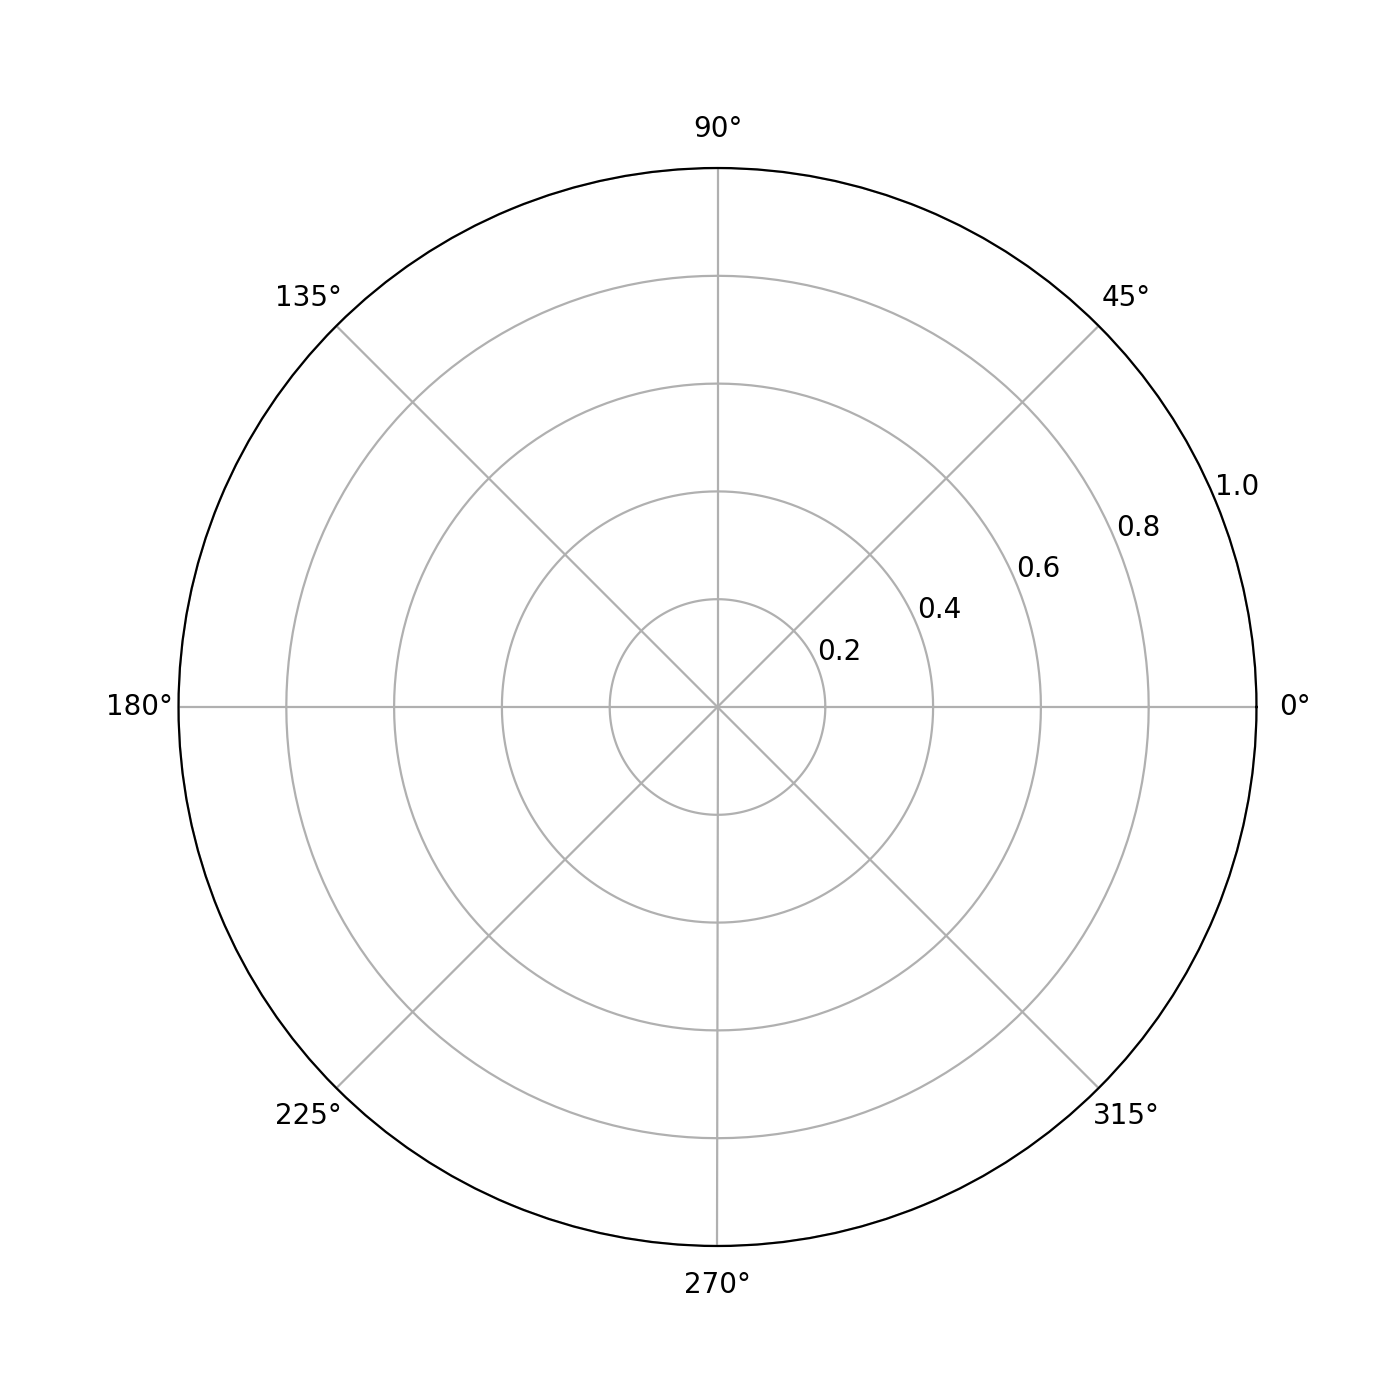

NameError: name 'x' is not defined

In [13]:
# Ellipse Animation 5D
# revision 5D uses r = a(1-e²)/(1+e*cos θ) from https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion#Position_as_a_function_of_time
# and θ ≈ M + 2e*sin(M) + (5/4)e²*sin(2M) + e³((13/12)sin(3M)-(1/4)sin(M)), eq. 36 from Müller, M (1995). "Equation of Time – Problem in Astronomy". Acta Physica Polonica A. Retrieved 23 February 2013

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter
from math import sin, cos

from math import floor
%matplotlib notebook
# set up figure size and DPI for screen demo
# plt.rcParams['figure.figsize'] = (7, 7)
# plt.rcParams['figure.dpi'] = 100

TWOPI = 2*np.pi # numpy doesn't have tau (2π)

# fig = plt.figure(figsize=(5, 10))
fig = plt.figure(figsize=(7, 7), dpi=100)
#fig = plt.figure()
ax = plt.subplot(1,1,1,projection='polar') # subplot(nrows, ncols, index, **kwargs)

# fig, ax = plt.subplots(projection='polar')

# h&k are offsets from the origin for later use when setting a star at a focus
# h = k = 0.0 # for now, the center of the ellipse is the origin
a = 1.2     # a is the semimajor axis
b = 0.8     # b is the semiminor axis (assuming a>b)

# e is eccentricity of the ellipse. e = |cf|/a, where |cf| is the distance from the center to a focus (=h, assuming no tilt) and a is the semimajor axis
# given a & b we can calculate e using e = sqrt(1-b²/a²)
if b<a:
    e = (1-b**2/a**2)**0.5
elif a<b:
    e = (1-a**2/b**2)**0.5
else: # a==b
    e = 0.0

datapoints = 120
datastepsize = TWOPI/datapoints
# theta until now has been the angle from the center of the ellipse. now it's the angle from the star at the focus
M = np.arange(0.0, TWOPI, datastepsize) # M is the Newton's Mean Anomoly, values from 0 to 2π in increments of datastepsize
# theta = M + 2*e*sin(M) + (5/4)*e**2*sin(2*M) + e**3*((13/12)*sin(3*M)-(1/4)*sin(M)) # not sure why this doesn't work but ok, i'll step through M
#theta = np.zeros(datapoints, dtype=float)
# for i in M:
# #     theta[i] = M[i] + 2*e*sin(M[i]) + (5/4)*e**2*sin(2*M[i]) + e**3*((13/12)*sin(3*M[i])-(1/4)*sin(M[i]))
#     print(f'step {i}: M[i]={M[i]} θ[i]={theta[i]}')
with np.nditer(M, op_flags=['readwrite']) as it:
    for m in it:
        x[...] = m + 2*e*sin(m) + (5/4)*e**2*sin(2*m) + e**3*((13/12)*sin(3*m)-(1/4)*sin(m))
        
theta = np.arange(0.0, TWOPI, datastepsize)

# cartesian:
# x = h + a*np.cos(theta)    # x values from -1 to 1
# y = h + b*np.sin(theta)    # y values from -1 to 1
# l = plt.plot(x, y,         # x,y ellipse plot
#              'b. ',        # made of blue dots--a visual check if the data points are
#             )              # evenly spaced (they shouldn't be for orbits)
# ax = plt.axis([-2,2,-2,2]) # plt.axis([xmin, xmax, ymin, ymax])
#                            # equivalent to ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# redDot, = plt.plot([x[0]], [y[0]], 'ro')

# polar:
r = np.full(floor(TWOPI/datastepsize), 1.0) # to draw a circle; fill an nparray of the same size as theta with all 1.0's
r = theta # to draw a spiral
r = a*(1-e**2)/(1+e*np.cos(theta))

plt.plot(theta, r, 'b. ')
# ax = plt.axis([-2,2,-2,2]) # plt.axis([xmin, xmax, ymin, ymax])
#                            # equivalent to ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

redDot, = plt.plot([theta[0]], r[0], 'ro')


# plt.plot

"""
Note that the value at x[-1] yields the last value in the numpy ndarray x.

It's the same value as x[floor(1000*TWOPI)], so when we want to reference various
values of x and y based on the iterator i with values from 0 to 2π the index of the
array x or y is the floor of 1000*i. It's times 1000 because we initially used a step
size of 1/1000 or 0.001. In the general case, it would be x[floor(i/datastepsize)].
"""

def animate(i):
#     redDot.set_data(np.cos(i), np.sin(i))
#     redDot.set_data(x[floor(i/datastepsize)], y[floor(i/datastepsize)])
#     redDot.set_data(x[floor(i/0.001)], y[floor(i/0.001)])
#     redDot.set_data(x[floor(i*1000)], y[floor(i*1000)])
    redDot.set_data(theta[floor(i/datastepsize)], r[floor(i/datastepsize)])
    plt.title('radians: {:^2.1f}'.format(i))
    return redDot,

# create animation using the animate() function

# disabling progress_callback lambda function during mybinder.org development on iPad :)

# progress_callback = lambda i, n: print(f'Saving frame {i+1} of {n}')
animation = FuncAnimation(fig, animate, 
                          frames=np.arange(0.0, TWOPI, 0.005),
#                           frames=theta,
                          interval=5, blit=True, repeat=False)

# animation = FuncAnimation(plt.gcf(), #get current figure or gcf
#                           update, #the function to update
#                           frames=frames, #overrides the default frames behavior of counting up i in integers from 0
#                           interval=interval,
#                           #repeat = False, #option to stop animation after one iteration
#                           repeat_delay = 2e3, #optional delay in ms; 1e3 = 1000 ms = 1 s
#                           #progress_callback=progress_callback
#                           )

# disabling saving .mp4 during mybinder.org development on iPad :)

# # from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Stephen Shadle'), bitrate=1800)
# #ani.save("/home/pi/Documents/Thonny/dynamic_image.mp4", writer=writer) #explicit directory
# animation.save("animate_ellipse.mp4", writer=writer, progress_callback=progress_callback) #current directory





In [4]:
e

0.7453559924999298

In [14]:
M[1]

0.05235987755982988

In [15]:
print(len(M), M)

120 [0.         0.05235988 0.10471976 0.15707963 0.20943951 0.26179939
 0.31415927 0.36651914 0.41887902 0.4712389  0.52359878 0.57595865
 0.62831853 0.68067841 0.73303829 0.78539816 0.83775804 0.89011792
 0.9424778  0.99483767 1.04719755 1.09955743 1.15191731 1.20427718
 1.25663706 1.30899694 1.36135682 1.41371669 1.46607657 1.51843645
 1.57079633 1.6231562  1.67551608 1.72787596 1.78023584 1.83259571
 1.88495559 1.93731547 1.98967535 2.04203522 2.0943951  2.14675498
 2.19911486 2.25147474 2.30383461 2.35619449 2.40855437 2.46091425
 2.51327412 2.565634   2.61799388 2.67035376 2.72271363 2.77507351
 2.82743339 2.87979327 2.93215314 2.98451302 3.0368729  3.08923278
 3.14159265 3.19395253 3.24631241 3.29867229 3.35103216 3.40339204
 3.45575192 3.5081118  3.56047167 3.61283155 3.66519143 3.71755131
 3.76991118 3.82227106 3.87463094 3.92699082 3.97935069 4.03171057
 4.08407045 4.13643033 4.1887902  4.24115008 4.29350996 4.34586984
 4.39822972 4.45058959 4.50294947 4.55530935 4.60766923 4.

In [16]:
theta

NameError: name 'theta' is not defined

In [ ]:
print(len(theta), theta)

In [ ]:
M[0]

In [ ]:
theta[0]

In [ ]:
M[0]-theta[0]

In [ ]:
M - theta

In [ ]:
len(r)

In [ ]:
datastepsize